In this notebook, we visualize some sweep results.
We create boxplots for each noise levels and both models to see:
- The performance of both models
- How performance relate to the number of iterations/layers

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import wandb
import numpy as np
import seaborn as sns
from wandb_analysis import get_metrics
wandb.login()

/Users/sizhuang/Desktop/GitHub Repos/IterativeMethods/iterENV/lib/python3.8/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
/Users/sizhuang/Desktop/GitHub Repos/IterativeMethods/iterENV/lib/python3.8/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
wandb: Currently logged in as: sizhuang. Use `wandb login --relogin` to force relogin


True

In [2]:
usual_sweeps = [
"yb9nj1j5", # noise 0
"s29ovdjm", # noise 1
"io2roeki", # noise 2
"ni1y0i2n", # noise 3
"c1v5292z", # noise 4
"f3kaci4y", # noise 5
"91g554g5"# noise 6
# "zgyfs4la"  # noise 7
]

iterative_sweeps = [
"8b5samb8", # noise 0
"4013a4eg", # noise 1 
"y4prhi94", # noise 2
"el1u1dr4", # noise 3
"4mlrggda", # noise 4
"qspwm421", # noise 5
"36x0z5q4" # noise 6
# "823rcbn7"  # noise 7  
]

variant_sweeps = [
"nhj93ccd", # noise 0
"z35d1w5v", # noise 1
"3qpjo1d3", # noise 2
"uhno0u30", # noise 3
"nm41at8u", # noise 4
"4fq47kn0", # noise 5 rerun
"9w9xq0qg", # noise 6
"kj2gmoex"# noise 7
]

# Plot barplots for one for each noise levels

In [ ]:
for noise_level, sweep_id in enumerate(usual_sweeps):
    ta, ni = get_metrics(sweep_id)
    data = pd.DataFrame({
    "test accuracy": ta,
    "number of layers": ni
    })
    plt.figure()
    sns.set(style="darkgrid")
    sns.boxplot(x='number of layers',
            y="test accuracy",
            data=data,
            width=0.4,
            flierprops={"marker": "x"},
            medianprops={"color": "red"},
            color="royalblue"
            ).set(title="GCN, noise level: "+str(noise_level/10))

# Plot boxplots for both models in one graph for each noise level

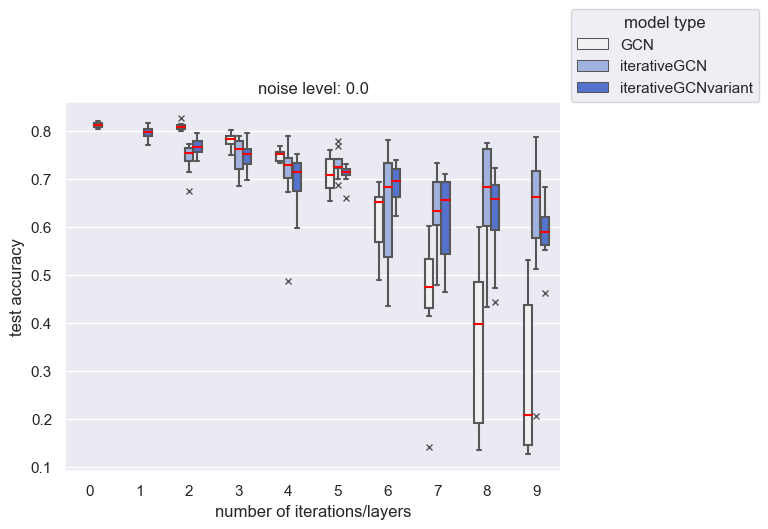

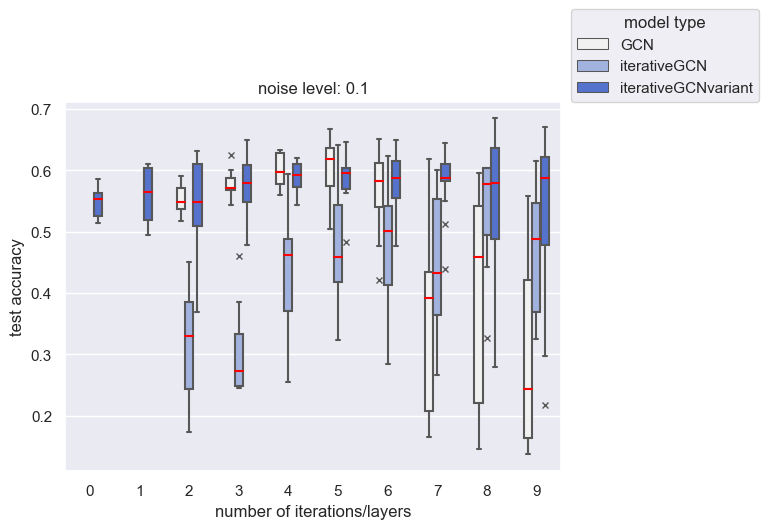

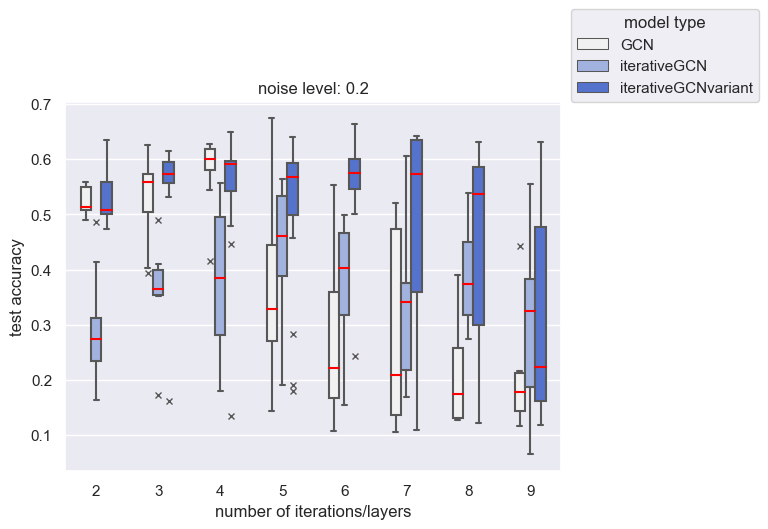

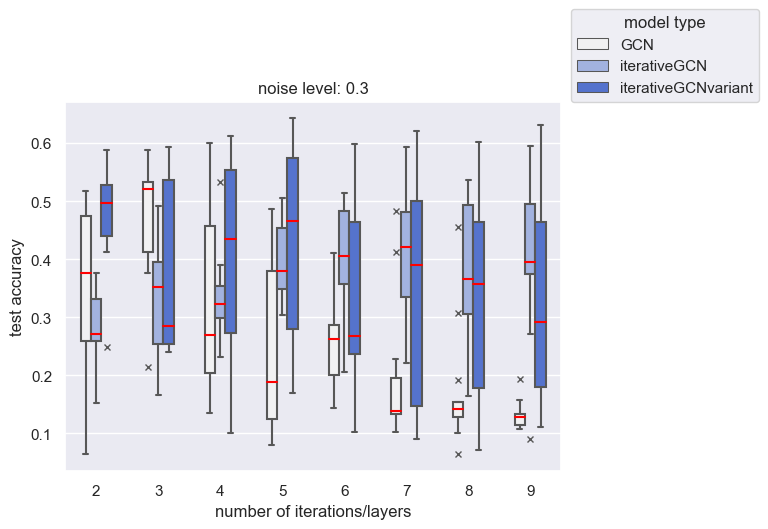

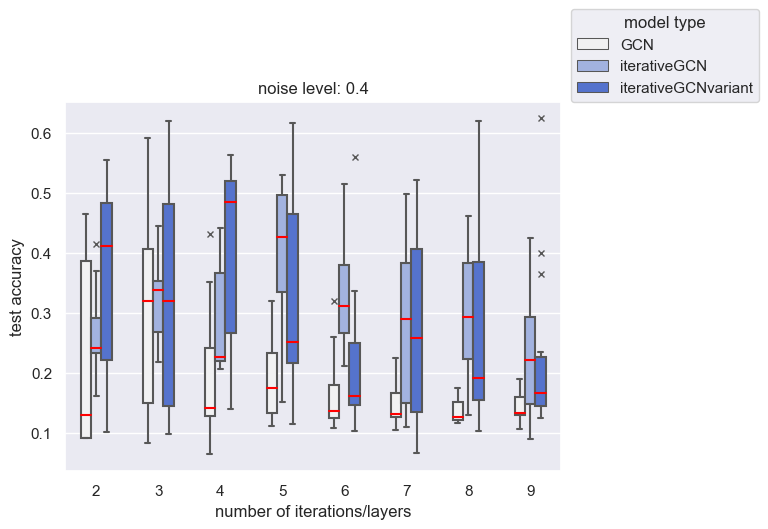

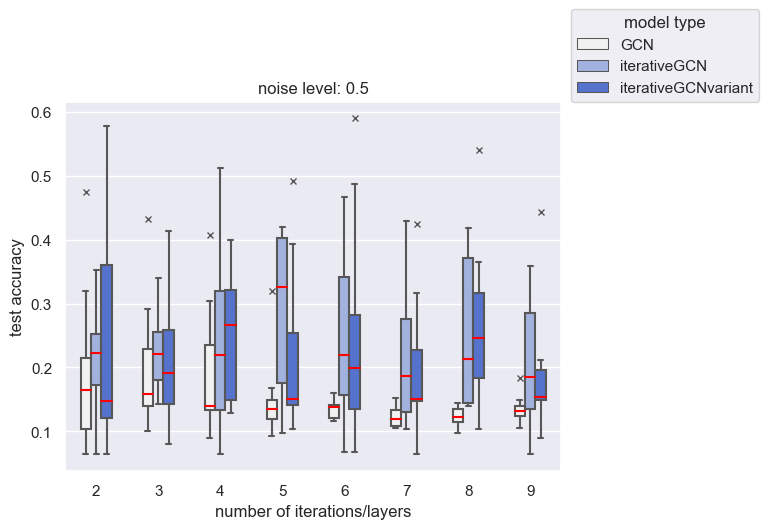

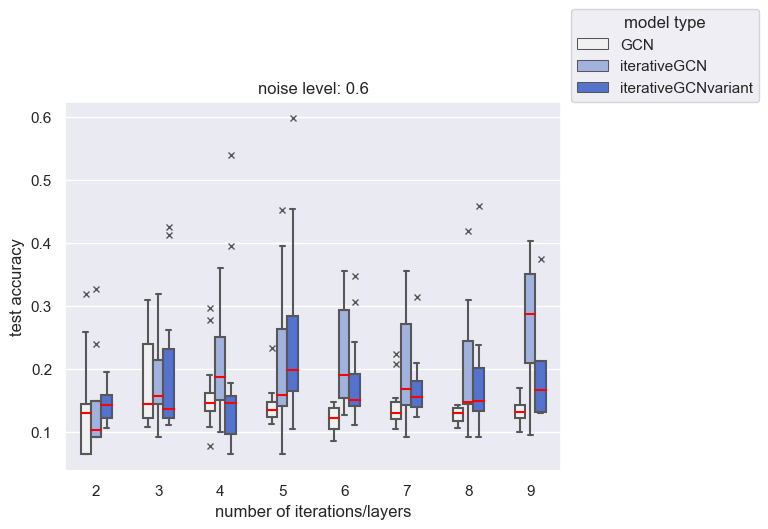

In [3]:
for noise_level, (usual_sweep_id, iterative_sweep_id, variant_sweep_id) in enumerate(zip(usual_sweeps, iterative_sweeps, variant_sweeps)):
    u_ta, u_nl = get_metrics(usual_sweep_id)
    u_model = ["GCN"] * len(u_nl)
    i_ta, i_ni = get_metrics(iterative_sweep_id)
    i_model = ["iterativeGCN"] * len(i_ni)
    v_ta, v_ni = get_metrics(variant_sweep_id)
    v_model = ["iterativeGCNvariant"] * len(v_ni)
    
    ta = u_ta + i_ta + v_ta
    ni = u_nl + i_ni + v_ni
    md = u_model + i_model + v_model
    assert len(ta) == len(u_ta) + len(i_ta) + len(v_ta)
    assert len(ni) == len(u_nl) + len(i_ni) + len(v_ni)
    assert len(md) == len(u_model) + len(i_model) + len(v_model)

    data = pd.DataFrame({
    "test accuracy": ta,
    "number of iterations/layers": ni,
    "model type": md
    })
    plt.figure()
    sns.set(style="darkgrid")
    bp = sns.boxplot(x='number of iterations/layers',
            y="test accuracy",
            data=data,
            width=0.5,
            hue="model type",
            flierprops={"marker": "x"},
            medianprops={"color": "red"},
            color="royalblue"
            )
    bp.set(title="noise level: "+str(noise_level/10))
    sns.move_legend(bp, loc=(1.02, 1))
    fig = bp.get_figure()
    name = "noise_level_"+str(noise_level/10)+".png"
    fig.savefig(name)